# Data preparation for final figures
*Collective Compass Project, DJA, 2022-2024*

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import requests
plt.rcParams.update({'font.size': 10}) # must set in top
plt.rcParams.update({'figure.figsize': (10, 4)}) # must set in top

---
## Download the data

In [2]:
# download a fresh copy of the dataset from the OSF
data_url = 'https://osf.io/f76rb//?action=download'
response = requests.get(data_url)

if response.status_code == 200:
    with open('../data/dat.csv', 'wb') as f:
        f.write(response.content)

In [3]:
df = pd.read_csv('../data/dat.csv')
df_test = df.dropna()

---
## Figure 1

Text(0, 0.5, 'Aantal')

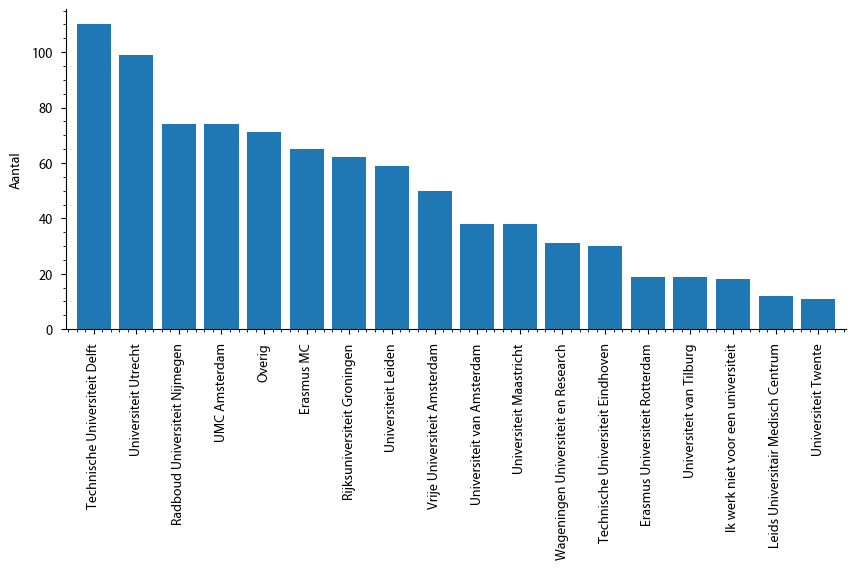

In [100]:
df = df.replace({
    'Academisch Medisch Centrum': 'UMC Amsterdam',
    'Vrije Universiteit medisch centrum': 'UMC Amsterdam'
})

fig1_data = df['institution'].value_counts()
ax = fig1_data.plot.bar(width=0.8);
ax.set_ylabel('Aantal')

In [102]:
fig1_data_eng = fig1_data.copy()
fig1_data_eng = fig1_data_eng.rename({
    'Technische Universiteit Delft': 'Delft University of Technology',
    'Universiteit Utrecht' : 'Utrecht University',
    'Radboud Universiteit Nijmegen': 'Radboud University',
    'Overig': 'Other',
    'Erasmus MC': 'Erasmus Medical Center',
    'Rijksuniversiteit Groningen': 'University of Groningen', 
    'Universiteit Leiden': 'Leiden University',
    'Vrije Universiteit Amsterdam': 'VU Amsterdam',
    'Universiteit van Amsterdam': 'University of Amsterdam',
    'Universiteit Maastricht': 'Maastricht University',
    'Wageningen Universiteit en Research': 'Wageningen University & Research',
    'Technische Universiteit Eindhoven': 'Eindhoven University of Technology',
    'Erasmus Universiteit Rotterdam': 'Erasmus University Rotterdam',
    'Universiteit van Tilburg': 'Tilburg University',
    'Ik werk niet voor een universiteit': 'I do not work in academia',
    'Leids Universitair Medisch Centrum': 'Leiden University Medical Center',
    'Universiteit Twente': 'University of Twente'
})

df_fig1 = pd.DataFrame({'Institution': fig1_data_eng.index, 'Count': fig1_data_eng.values})
df_fig1 = df_fig1.set_index('Institution')
df_fig1

,Count
Institution,
Delft University of Technology,110
Utrecht University,99
Radboud University,74
UMC Amsterdam,74
Other,71
Erasmus Medical Center,65
University of Groningen,62
Leiden University,59
VU Amsterdam,50


In [103]:
df_fig1.to_excel('funding_consultation_final_plots_fig1.xlsx')

---
## Figure 2

In [104]:
df_vals = df[['discipline', 'sex']].value_counts().unstack('sex')
df_vals = df_vals.rename(columns={'Man': 'male', 'Vrouw': 'female'})
df_vals = df_vals.rename({
    'Beta and medicine': 'Beta / medicine',
    'Economy, business, law': 'Economy / business / law',
    'Humanities and social sciences': 'Humanities / social sciences'
})
df_vals

sex,male,female
discipline,,
Beta / medicine,276,174
Economy / business / law,45,34
Humanities / social sciences,63,118


In [105]:
df_vals.to_excel('funding_consultation_final_plots_fig2.xlsx')

Text(22.99999999999998, 0.5, 'Count')

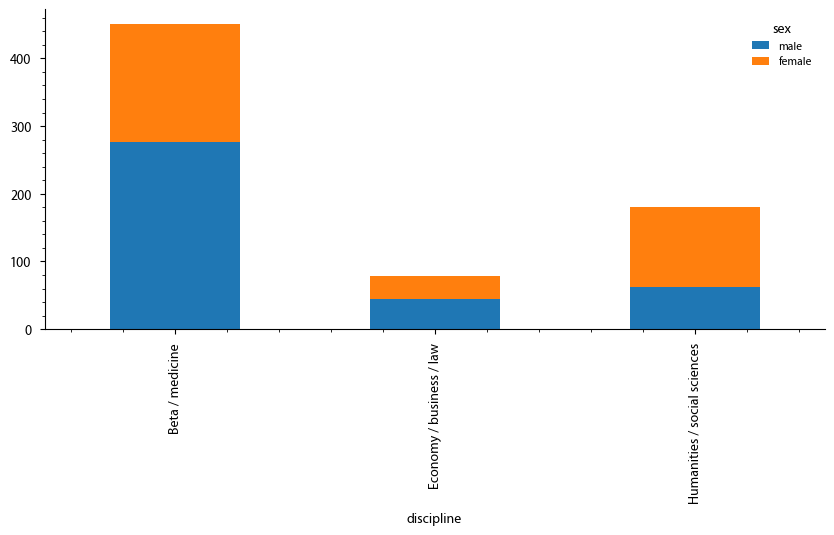

In [106]:
df_vals.plot.bar(stacked=True);
ax.set_ylabel('Count')

---
## Figure 3

In [107]:
df_vals = df[['pos9', 'sex']].value_counts()
df_vals = df_vals.unstack('sex')
df_vals = df_vals.rename(columns={'Man': 'male', 'Vrouw': 'female'})
df_vals = df_vals.rename_axis(index=["appointment"])
df_vals = df_vals.rename({
    'Anders': 'Other',
    'Assistant prof/UD (temporary)': 'Assistant professor (no tenure)',
    'Assistant prof/UD (tenured)': 'Assistant professor (tenured)',
    'Associate prof/UHD': 'Associate professor',
    #'PhD': ,
    #'Postdoc':,
    'Prof / Hoogleraar': 'Full professor',
    'Student/Onderzoeksassistent/junior onderzoeker': 'Junior researcher'
})
df_vals.to_excel('funding_consultation_final_plots_fig3.xlsx')

Text(0, 0.5, 'Count')

<Figure size 1000x400 with 0 Axes>

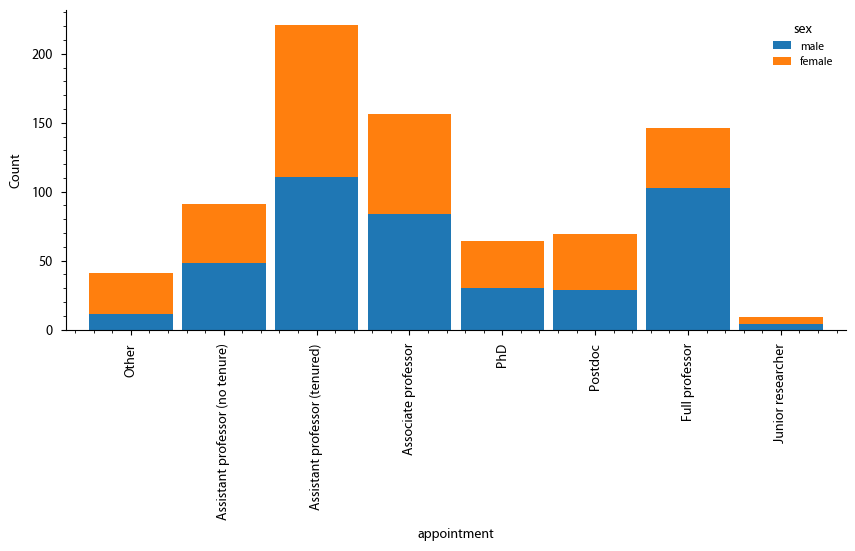

In [108]:
plt.figure()
ax = df_vals.plot.bar(stacked=True, width=0.9);
ax.set_ylabel('Count')